<a href="https://colab.research.google.com/github/gggggeun/Project/blob/main/AI_01_%EB%AC%B8%EC%A7%80%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다음 분기에 미국을 타겟으로 시뮬레이션게임을 출시해도 되는가

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import random
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [ ]:
from google.colab import files
files.upload()

In [8]:
df = pd.read_csv('vgames2.csv')                                             # NaN : 'Genre' :50, 'Publisher' :58, 'Year' :271

# df.isnull().sum()                                                         # 'Genre','Publisher' : NaN -> 'Unknown'
df.drop(columns='Unnamed: 0',inplace=True)
df['Genre'].fillna('Misc',inplace=True)
df['Publisher'].fillna('Unknown',inplace=True)

#df['NA_Sales'].unique()                                                    # 나라별 매출액 전처리 # 달러 
df['NA'] = np.where(df['NA_Sales'].str.contains('K'), 1000, 1000000)
df['EU'] = np.where(df['EU_Sales'].str.contains('K'), 1000, 1000000)
df['JP'] = np.where(df['JP_Sales'].str.contains('K'), 1000, 1000000)
df['Other'] = np.where(df['Other_Sales'].str.contains('K'), 1000, 1000000)

df1 = df.columns[5:9]
for i in df1 :
  df[i]=df[i].apply(lambda x: x.strip('M'))
  df[i]=df[i].apply(lambda x: x.replace('K',''))
  df[i]=df[i].astype('float')

df['NA_Sales']=df['NA_Sales']*df['NA']
df['EU_Sales']=df['EU_Sales']*df['EU']
df['JP_Sales']=df['JP_Sales']*df['JP']
df['Other_Sales']=df['Other_Sales']*df['Other']
gamedata=df.drop(['NA','EU','JP','Other'],axis=1)

#천단위 콤마
np.set_printoptions(formatter={'int_kind': '{:,}'.format})
pd.options.display.float_format = '{:0,.2f}'.format
                                                                            # Year 전처리
#gamedata['Year'].unique()                                                  # 4자리 수로 통합
def fix_year(year):
  result =''
  if year <= 16 : result =2000+year
  elif 16< year <100 : result = 1900+year
  else : result = year
  return result
gamedata['Year']=gamedata['Year'].apply(lambda x : fix_year(x))

                                                                            # Year : NaN -> Platform 사용의 평균년도
group=gamedata.groupby('Platform')['Year'].mean().round(0)
gamedata2=pd.merge(gamedata,group,how='left',on='Platform')
gamedata2['Year_x'] = np.where(gamedata2['Year_x'].isnull(), gamedata2['Year_y'].values, gamedata2['Year_x'].values)
game=gamedata2.drop('Year_y',axis=1).sort_values('Year_x',ascending=True).rename(columns={'Year_x' : 'Year'}).reset_index(drop=True).astype({'Year': int})

def generation(years):                                                      # Decates 추가
  result2 =''
  if 1980 <= years < 1990 : result2 ='1980s'
  elif 1990<= years <2000 : result2 = '1990s'
  elif 2000 <= years <2010 : result2 = '2000s'
  elif 2010 <= years <2020 : result2 = '2010s'
  else : result2 = '2020s'
  return result2
game['Sum_Sales']=game['NA_Sales']+game['EU_Sales']+game['JP_Sales']+game['Other_Sales']
game['Decades']=game['Year'].apply(lambda x : generation(x))
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales,Decades
0,Asteroids,2600,1980,Shooter,Atari,"4,000,000.00","260,000.00",0.00,"50,000.00","4,310,000.00",1980s
1,Kaboom!,2600,1980,Misc,Activision,"1,070,000.00","70,000.00",0.00,"10,000.00","1,150,000.00",1980s
2,Bridge,2600,1980,Misc,Activision,"250,000.00","20,000.00",0.00,0.00,"270,000.00",1980s
3,Ice Hockey,2600,1980,Misc,Activision,"460,000.00","30,000.00",0.00,"10,000.00","500,000.00",1980s
4,Missile Command,2600,1980,Shooter,Atari,"2,560,000.00","170,000.00",0.00,"30,000.00","2,760,000.00",1980s
...,...,...,...,...,...,...,...,...,...,...,...
16593,Super Robot Wars OG: The Moon Dwellers,PS3,2016,Misc,Namco Bandai Games,0.00,0.00,"60,000.00",0.00,"60,000.00",2010s
16594,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,"10,000.00",0.00,"10,000.00",2010s
16595,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,"10,000.00",0.00,"10,000.00",2010s
16596,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,"30,000.00",0.00,"30,000.00",2010s


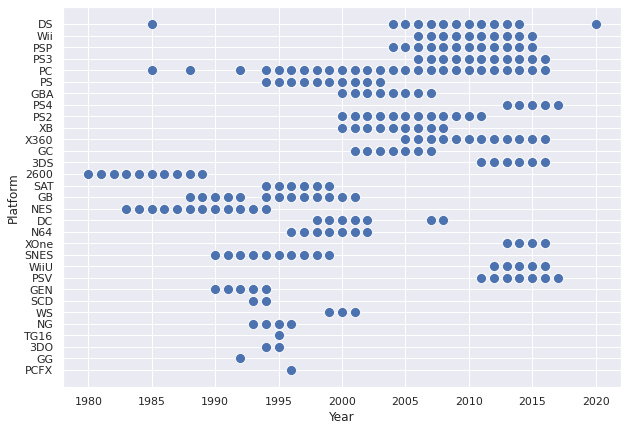

In [ ]:
#연도별 게임기(Platform) 사용 종류
plt.figure(figsize=(10,7))
sns.scatterplot(x='Year',y='Platform', s=100, data=gamedata)

plt.show()

#전 세계 게임업종 총 매출량

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


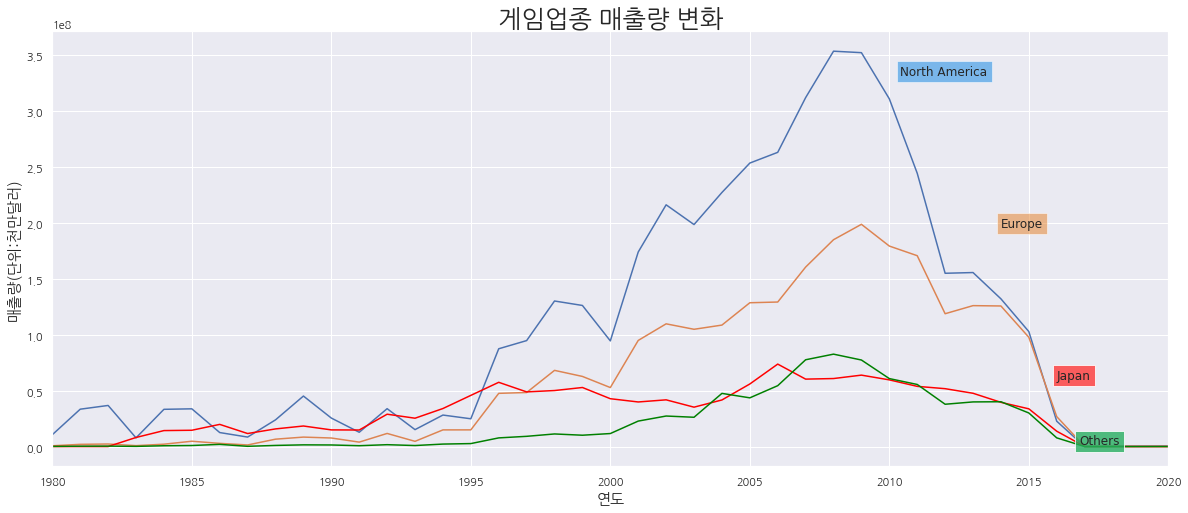

In [ ]:
# 연도에 따른 게임업종 판매 매출량 변화
a1=game.groupby(['Decades','Year'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
a1=a1.reset_index()
a2=game.groupby(['Decades','Year','Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
a2=a2.reset_index()
# 선그래프
plt.rc('font', family='NanumGothic')
plt.plot(a1['Year'],a1['NA_Sales']);
plt.plot(a1['Year'],a1['EU_Sales']);
plt.plot(a1['Year'],a1['JP_Sales'],color='red');
plt.plot(a1['Year'],a1['Other_Sales'],color='green');
sns.set_theme(style="darkgrid")
#plt.style.use('classic')
#plt.legend()
plt.title("게임업종 매출량 변화",fontsize=25)
plt.ylabel('매출량(단위:천만달러)',fontsize=15)
plt.xlabel('연도',fontsize=15)
ax = plt.gca()
ax.text(.76, .9, "North America", transform=ax.transAxes, bbox=dict(facecolor='#0984e3',alpha=0.5))
ax.text(.85, .55, "Europe", transform=ax.transAxes, bbox=dict(facecolor='#e67e22', alpha=0.5))
ax.text(.9, .2, "Japan", transform=ax.transAxes, bbox=dict(facecolor='#ff3838', alpha=0.8))
ax.text(.92, .05, "Others", transform=ax.transAxes, bbox=dict(facecolor='#27ae60', alpha=0.8))

ax.set_xlim(1980,2020)
plt.gcf().set_size_inches(20, 8)

In [ ]:
#지역에 따른 연도별 총 매출
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("North America & 연간 총 매출", "Europe & 연간 총 매출","Japan & 연간 총 매출",'Other countries & 연간 총 매출'))

fig.add_bar(x=a1['Year'],y=a1['NA_Sales'],text=a1['Year'], name='North America',row=1, col=1)
fig.add_bar(x=a1['Year'],y=a1['EU_Sales'],text=a1['Year'], name='Europe',row=1, col=2)
fig.add_bar( x=a1['Year'],y=a1['JP_Sales'],text=a1['Year'], name='Japan', row=2, col=1)
fig.add_bar( x=a1['Year'],y=a1['Other_Sales'],text=a1['Year'], name='Other',row=2, col=2)
fig.update_layout(barmode='stack')
fig.update_xaxes(ticks="inside")
fig.update_yaxes(ticks="inside", col=1)
fig.show()

In [ ]:
#연대별 평균 매출액
a4=game.groupby(['Decades','Year','Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()
a4=a4.reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("North America", "Europe","Japan",'Other countries'))
fig.add_bar(x=a4['Decades'],y=a4['NA_Sales'],text=a4['Genre'], name='North America',row=1, col=1)
fig.add_bar(x=a4['Decades'],y=a4['EU_Sales'],text=a4['Genre'], name='Europe',row=1, col=2)
fig.add_bar(x=a4['Decades'], y=a4['JP_Sales'],text=a4['Genre'], name='Japan', row=2, col=1)
fig.add_bar(x=a4['Decades'], y=a4['Other_Sales'],text=a4['Genre'], name='Other',row=2, col=2)
fig.update_layout( barmode='stack')
fig.update_xaxes(ticks="inside")
fig.update_yaxes(ticks="inside", col=1)
fig.show()

# 지역 별 게임 장르 선호도

## 전체

In [ ]:
#지역에 따라 선호하는 게임 장르
a1=game.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
a1_v=a1.values

import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
genre = a1.index
na = a1['NA_Sales'].values
eu = a1['EU_Sales'].values
jp = a1['JP_Sales'].values
other = a1['Other_Sales'].values

data1 = {"values": na,"labels": genre,"domain": {"row":0,"column": 0},"name": "North America","hoverinfo":"label+percent+name","hole": .4,"type": "pie"}
data2 = {"values": eu,"labels": genre,"domain": {"row":0,"column": 1},"name": "Europe","hoverinfo":"label+percent+name","hole": .4,"type": "pie"}
data3 = {"values": jp,"labels": genre,"domain": {"row":1, "column": 0},"name": "Japan","hoverinfo":"label+percent+name","hole": .4,"type": "pie"}
data4 = {"values": other,"labels": genre,"domain": {"row":1, "column": 1},"name": "Others","hoverinfo":"label+percent+name","hole": .4,"type": "pie"}
data = [data1,data2,data3,data4]
layout = go.Layout({"grid": {"rows": 2, "columns": 2},"margin" :{"l":0, "r":0, "b":0, "t":32},
                    "annotations": [{"font": {"size": 12.5, "color":'black'},"showarrow": False,"text": "North America","x": 0.198,"y": 0.785},
                                    {"font": {"size": 15, "color":'black'},"showarrow": False,"text": "Europe","x": 0.787,"y": 0.79},
                                    {"font": {"size": 15, "color":'black'},"showarrow": False,"text": "Japan","x": 0.22,"y": 0.222},
                                    {"font": {"size": 15, "color":'black'},"showarrow": False,"text": "Others","x": 0.785,"y": 0.222}]})
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title={'text': "1980년-2020년 게임 장르별 매출량",'y':0.99,'x':0.49,'xanchor': 'center','yanchor': 'top','font': {"size":25}})

iplot(fig)

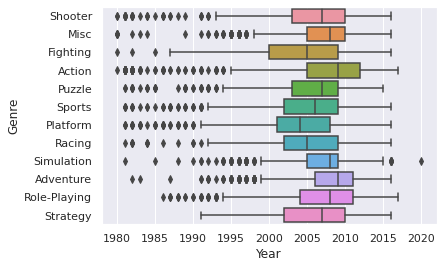

In [ ]:
# 연도에 따른 게임 장르 boxplot
sns.boxplot(x='Year',y='Genre',data=game);

## 북미

In [ ]:
import plotly.express as px
fig = px.bar(a2, x="Decades", y="NA_Sales",
             color='Genre', barmode='group',
             height=400,title='North Ameria 연대별 게임 장르 선호도')
fig.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(10,10))
fig = px.line(a2, x="Year", y="NA_Sales", color="Genre",title='North Ameria 게임 장르 선호도 변화')
fig.show()

<Figure size 720x720 with 0 Axes>

## 유럽

In [ ]:
import plotly.express as px
fig = px.bar(a2, x="Decades", y="EU_Sales",
             color='Genre', barmode='group',
             height=400,title='Europe 연대별 게임 장르 선호도')
fig.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(10,10))
fig = px.line(a2, x="Year", y="EU_Sales", color="Genre", title='Europe 게임 장르 선호도 변화')
fig.show()

<Figure size 720x720 with 0 Axes>

## 일본

In [ ]:
import plotly.express as px
fig = px.bar(a2, x="Decades", y="JP_Sales",
             color='Genre', barmode='group',
             height=400,title='Japan 연대별 게임 장르 선호도')
fig.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(10,10))
fig = px.line(a2, x="Year", y="JP_Sales", color="Genre", title='Japan 게임 장르 선호도 변화')
fig.show()

<Figure size 720x720 with 0 Axes>

## 그 외

In [ ]:
import plotly.express as px
fig = px.bar(a2, x="Decades", y="Other_Sales",
             color='Genre', barmode='group',
             height=400,title='Other countries 연대별 게임 장르 선호도')
fig.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(10,10))
fig = px.line(a2, x="Year", y="Other_Sales", color="Genre", title='Other countries 게임 장르 선호도 변화')
fig.show()

<Figure size 720x720 with 0 Axes>

# 군집화

Proportion of Variance Explained :  [0.86166154 0.12973247]
Cumulative Prop. Variance Explained:  [86.16615404 99.1394009 ]


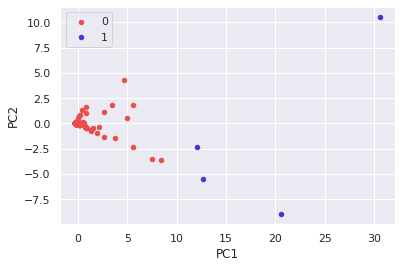

In [ ]:
nasale=game.sort_values('NA_Sales',ascending=0)
publisher=game.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
# 게임회사와 나라별 매출액 clustering
X=np.array(publisher.values)
scaler=StandardScaler()
Z= scaler.fit_transform(X)
pca=PCA(2)
pca.fit(Z)
B3=pca.transform(Z)
print('Proportion of Variance Explained : ', pca.explained_variance_ratio_)
print('Cumulative Prop. Variance Explained: ', np.cumsum(pca.explained_variance_ratio_)*100)

pc_df2 = pd.DataFrame(data = B3, columns = ['PC1', 'PC2'])
pc_df2

kmeans = KMeans(n_clusters = 2)
kmeans.fit(pc_df2)
pc_df2['cluster'] = kmeans.labels_
pc_df2
colors = {0 : '#eb4d4b', 1 : '#4834d4'}
fig, ax = plt.subplots()
grouped = pc_df2.groupby('cluster')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', label = key, color = colors[key])
plt.show()

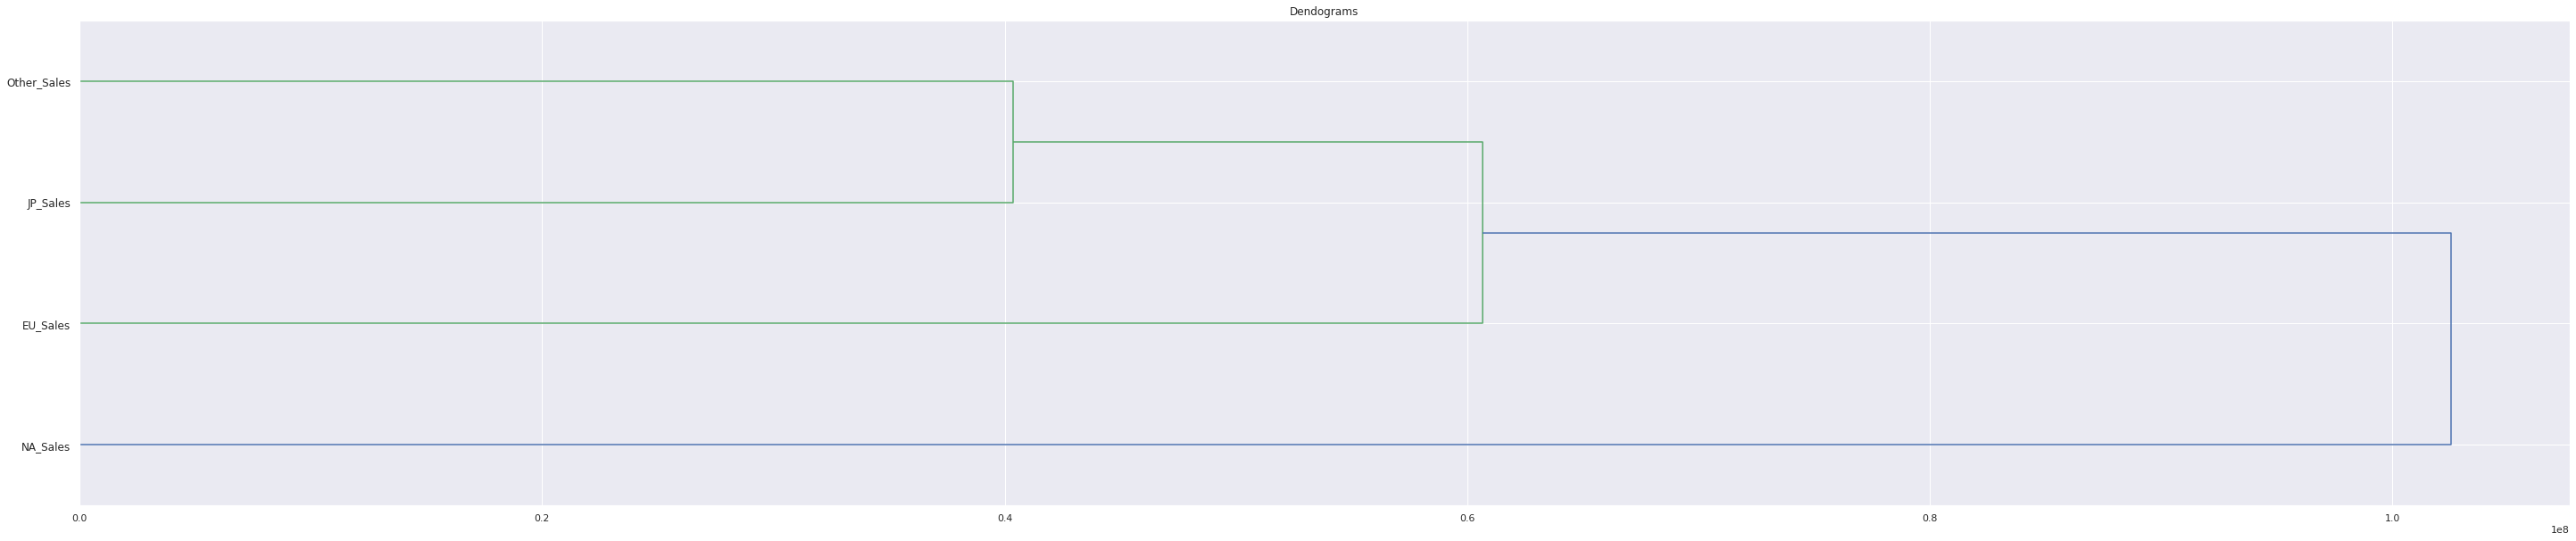

In [ ]:
sales=game[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transpose()
# 나라/매출합계 계층군집화
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(50, 10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(sales, method='ward'),leaf_font_size=12, orientation='right', labels=sales.index)

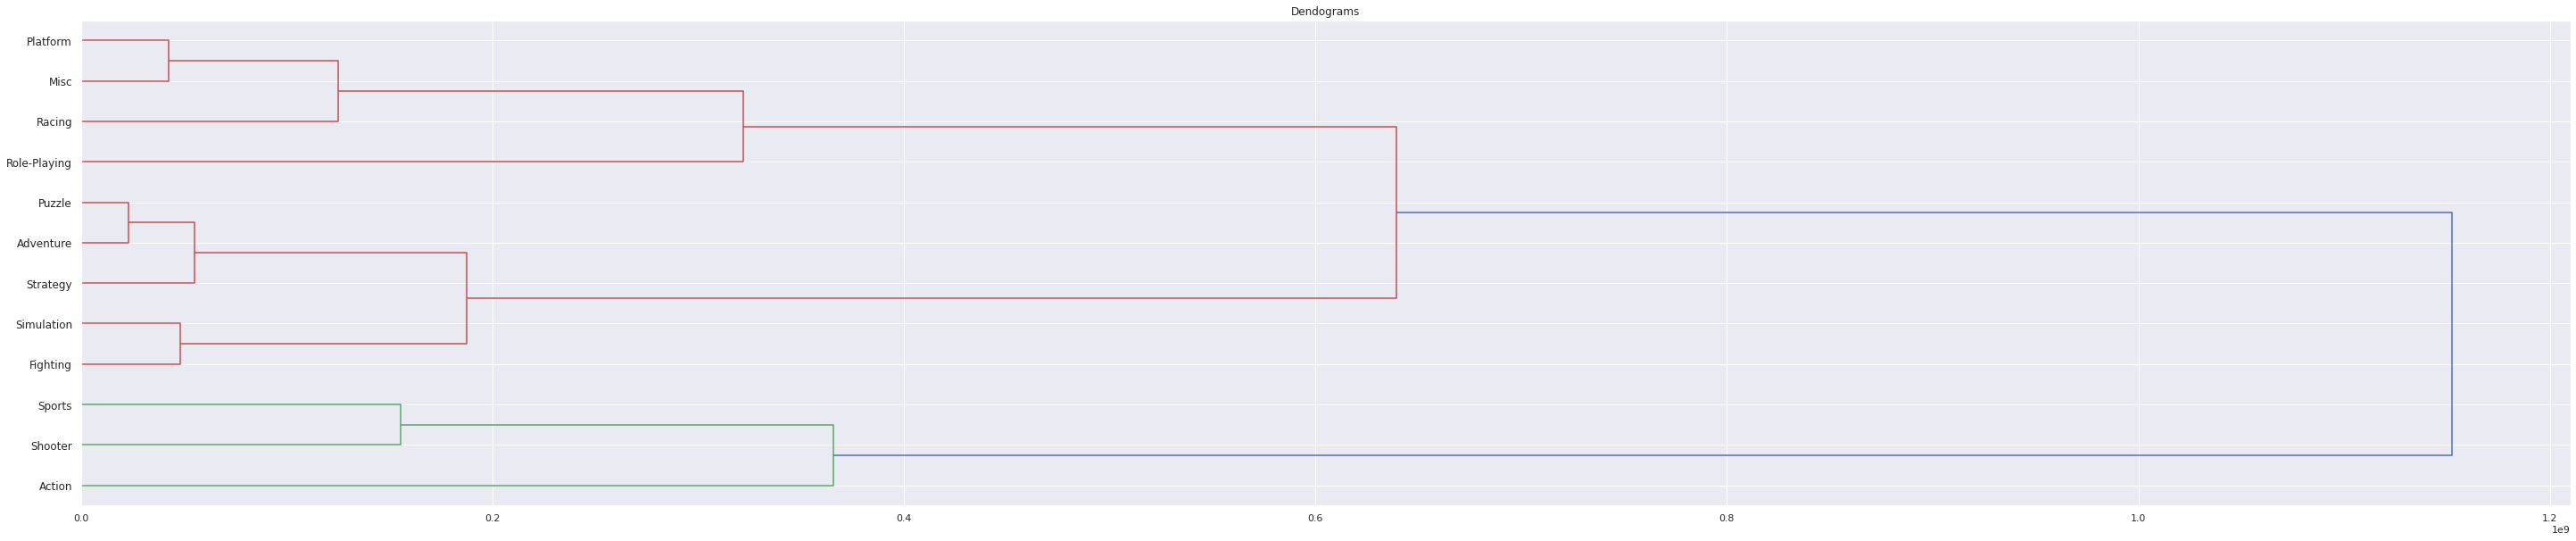

In [ ]:
# 장르/매출합계 계층군집화
import scipy.cluster.hierarchy as shc
genre=game.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
plt.figure(figsize=(50, 10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(genre, method='ward'),leaf_font_size=12, orientation='right', labels=genre.index)

#매출이 높은 게임

In [ ]:
#게임 매출 순위 100개
sumsale=game.sort_values('Sum_Sales',ascending=0)
sumsale=sumsale.iloc[:100]
sumsale

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales,Decades
6874,Wii Sports,Wii,2006,Sports,Nintendo,"41,490,000.00","29,020,000.00","3,770,000.00","8,460,000.00","82,740,000.00",2000s
139,Super Mario Bros.,NES,1985,Platform,Nintendo,"29,080,000.00","3,580,000.00","6,810,000.00","770,000.00","40,240,000.00",1980s
8703,Mario Kart Wii,Wii,2008,Racing,Nintendo,"15,850,000.00","12,880,000.00","3,790,000.00","3,310,000.00","35,830,000.00",2000s
10075,Wii Sports Resort,Wii,2009,Sports,Nintendo,"15,750,000.00","11,010,000.00","3,280,000.00","2,960,000.00","33,000,000.00",2000s
738,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,"11,270,000.00","8,890,000.00","10,220,000.00","1,000,000.00","31,380,000.00",1990s
...,...,...,...,...,...,...,...,...,...,...,...
1260,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,"3,780,000.00","2,170,000.00","1,310,000.00","310,000.00","7,570,000.00",1990s
190,Super Mario Bros. 2,NES,1988,Platform,Nintendo,"5,390,000.00","1,180,000.00","700,000.00","190,000.00","7,460,000.00",1980s
15289,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,"3,240,000.00","1,350,000.00","2,420,000.00","430,000.00","7,440,000.00",2010s
9021,Call of Duty: World at War,X360,2008,Shooter,Activision,"4,790,000.00","1,900,000.00",0.00,"690,000.00","7,380,000.00",2000s


In [ ]:
publisher2=sumsale.groupby(['Publisher','Name'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Sum_Sales']].sum()
publisher2=publisher2.reset_index()
publisher2

,Publisher,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,Activision,Call of Duty 4: Modern Warfare,"5,910,000.00","2,380,000.00","130,000.00","900,000.00","9,320,000.00"
1,Activision,Call of Duty: Advanced Warfare,"2,800,000.00","3,300,000.00","140,000.00","1,370,000.00","7,610,000.00"
2,Activision,Call of Duty: Black Ops,"15,650,000.00","8,170,000.00","590,000.00","2,960,000.00","27,370,000.00"
3,Activision,Call of Duty: Black Ops 3,"5,770,000.00","5,810,000.00","350,000.00","2,310,000.00","14,240,000.00"
4,Activision,Call of Duty: Black Ops II,"13,240,000.00","10,180,000.00","720,000.00","3,640,000.00","27,780,000.00"
...,...,...,...,...,...,...,...
86,Take-Two Interactive,Grand Theft Auto: Liberty City Stories,"2,900,000.00","2,830,000.00","240,000.00","1,750,000.00","7,720,000.00"
87,Take-Two Interactive,Grand Theft Auto: San Andreas,"9,430,000.00","400,000.00","410,000.00","10,570,000.00","20,810,000.00"
88,Take-Two Interactive,Grand Theft Auto: Vice City,"8,410,000.00","5,490,000.00","470,000.00","1,780,000.00","16,150,000.00"
89,Ubisoft,Just Dance 2,"5,840,000.00","2,890,000.00","10,000.00","780,000.00","9,520,000.00"


In [ ]:
import plotly.express as px
fig = px.bar(publisher2, x="Publisher", y="Sum_Sales",
             title='전세계 최고 매출 게임회사')
fig.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(20,10))
fig = px.bar(publisher2, x="Publisher", y="Sum_Sales",
             color='Name', barmode='group',
             title='전세계 게임매출회사 TOP11')
fig.show()

<Figure size 1440x720 with 0 Axes>